#### Making a singular data table of all our data

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
#Importing data from csv's
traffic = pd.read_csv('reduced-Chicago_Traffic_Tracker_-_Historical_Congestion_Estimates_by_Segment_-_2011-2018_20240329.csv')
weather = pd.read_csv('weather-chicago, il 2018-04-01 to 2018-05-01.csv')
crashes = pd.read_csv("Traffic_Crashes_-_Crashes_20240329.csv")
segments = pd.read_csv("segments_dict.csv")

In [3]:
#Importing crash (location only) data to possibly use later
crashes_minimal = crashes[["CRASH_RECORD_ID", "CRASH_DATE", "LATITUDE", "LONGITUDE"]]

In [4]:
# These functions turn the timestamp in the traffic dataset into the nearst time stamp
# of the weather dataset (in that weather dataset's format), for merging
def traffic_time_to_weather_time(instr):
    date = instr.split()[0]
    #print(date)
    time = instr.split()[1]
    ampm = instr.split()[2]
    
    year = date.split("/")[2]
    month = date.split("/")[0]
    day = date.split("/")[1]
    
    hour = time.split(":")[0] if ampm == "AM" else str(int(time.split(":")[0])+12)
    
    return (year+"-"+month+"-"+day+"T"+hour+":00:00")
def make_new_time(row):
    return traffic_time_to_weather_time(row["TIME"])

In [5]:
traffic["datetime"] = traffic.apply(make_new_time, axis=1)
traffic

,TIME,SEGMENTID,BUS COUNT,MESSAGE COUNT,SPEED,datetime
0,04/30/2018 11:50:28 PM,1133,1,5,27,2018-04-30T23:00:00
1,04/30/2018 11:50:28 PM,1133,1,5,27,2018-04-30T23:00:00
2,04/30/2018 11:50:28 PM,1153,1,4,23,2018-04-30T23:00:00
3,04/30/2018 11:50:28 PM,1153,1,4,23,2018-04-30T23:00:00
4,04/30/2018 11:50:28 PM,1178,1,5,16,2018-04-30T23:00:00
...,...,...,...,...,...,...
2577596,04/01/2018 12:01:06 AM,203,1,12,18,2018-04-01T12:00:00
2577597,04/01/2018 12:01:06 AM,204,1,1,24,2018-04-01T12:00:00
2577598,04/01/2018 12:01:06 AM,205,1,7,24,2018-04-01T12:00:00
2577599,04/01/2018 12:01:06 AM,206,1,6,24,2018-04-01T12:00:00


In [6]:
# New merged dataset 
traffic_merged = traffic.merge(weather, how='left')
traffic_merged.columns

Index(['TIME', 'SEGMENTID', 'BUS COUNT                ', 'MESSAGE COUNT',
       'SPEED', 'datetime', 'name', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')

#### Test/Train split

In [96]:
np.random.seed(569)

In [97]:
# Proportion of the dataset to reserve for testing. We can change this later
test_proportion = 0.2

In [98]:
#A count to make sure we don't lose any indices
len(traffic_merged)

2577601

In [99]:
# Test/train splits, with the count at the end to make sure we have the same number of indices at the end
permutation = np.random.permutation(range(len(traffic_merged)))
test_indicies = permutation[:int(test_proportion * len(traffic_merged))]
train_indicies = permutation[int(test_proportion * len(traffic_merged)):]
np.unique(len(test_indicies)+len(train_indicies))

array([2577601])

In [100]:
# Our test dataframe is test_df, and the train dataframe is train_df
test_df = traffic_merged.iloc[test_indicies]
train_df = traffic_merged.iloc[train_indicies]

#### Selecting Columns

(array([2306808.,       0.,       0.,  169268.,       0.,       0.,
          95781.,       0.,       0.,    5744.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

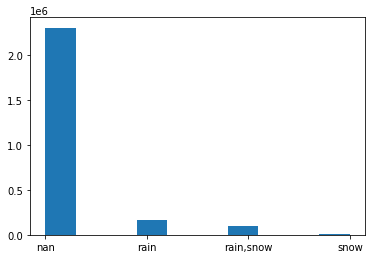

In [337]:
plt.hist(traffic_merged['preciptype'].tolist())

(array([2.389118e+06, 3.261900e+04, 1.354800e+04, 9.838000e+03,
        5.079000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 8.420000e+02]),
 array([0.    , 0.0117, 0.0234, 0.0351, 0.0468, 0.0585, 0.0702, 0.0819,
        0.0936, 0.1053, 0.117 ]),
 <BarContainer object of 10 artists>)

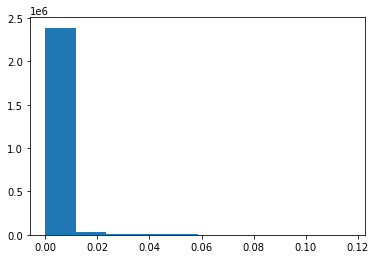

In [338]:
plt.hist(traffic_merged['precip'].tolist())

(array([1818613.,  205791.,   95396.,   76252.,   63018.,   12746.,
          92044.,   21187.,   49495.,   16502.]),
 array([0.   , 0.114, 0.228, 0.342, 0.456, 0.57 , 0.684, 0.798, 0.912,
        1.026, 1.14 ]),
 <BarContainer object of 10 artists>)

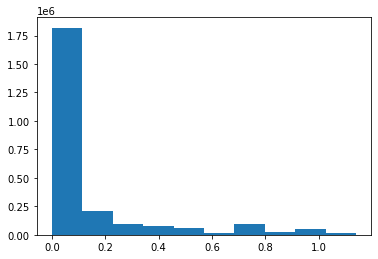

In [31]:
plt.hist(traffic_merged['snowdepth'].tolist())

(array([124956., 319959., 425658., 365893., 341587., 329877., 345286.,
         93955.,  73044.,  30829.]),
 array([ 4.7 ,  7.95, 11.2 , 14.45, 17.7 , 20.95, 24.2 , 27.45, 30.7 ,
        33.95, 37.2 ]),
 <BarContainer object of 10 artists>)

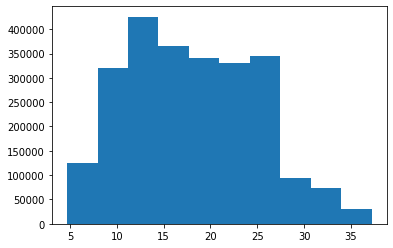

In [32]:
plt.hist(traffic_merged['windgust'].tolist())

(array([141569., 237557., 435033., 518121., 430190., 363390., 181580.,
        103345.,  27853.,  12406.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

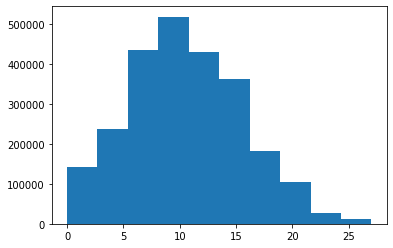

In [57]:
plt.hist(traffic_merged['windspeed'].tolist())

In [56]:
np.sort((traffic_merged['windspeed'].tolist()))[-100000:]

array([nan, nan, nan, ..., nan, nan, nan])

For windspeed, coerce nan values to 0. For windgust, coerce nan values to windgust 

(array([516395., 480010., 292720.,  61269.,  63218., 144145., 133362.,
        269909., 284939., 205077.]),
 array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.]),
 <BarContainer object of 10 artists>)

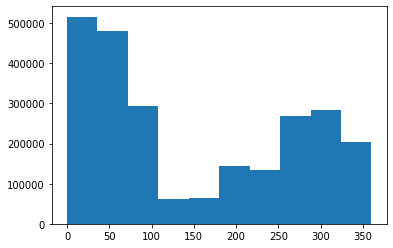

In [78]:
plt.hist(traffic_merged['winddir'].tolist())
#drop this, as direction encapsulated as a number doesn't make too much sense

(array([ 60273., 118634., 198104., 355275., 348019., 372042., 430020.,
        276786., 153148., 138743.]),
 array([ 999.5 , 1002.96, 1006.42, 1009.88, 1013.34, 1016.8 , 1020.26,
        1023.72, 1027.18, 1030.64, 1034.1 ]),
 <BarContainer object of 10 artists>)

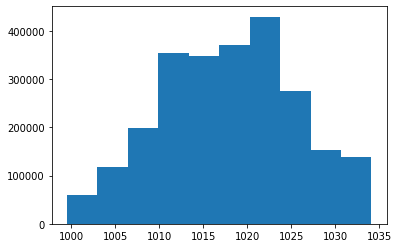

In [60]:
plt.hist(traffic_merged['sealevelpressure'].tolist())

(array([261221.,  39428., 400609.,  68506.,  97738.,  42468.,  64564.,
        271570., 377835., 827105.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

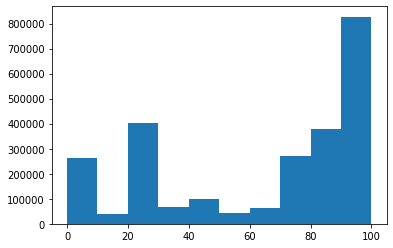

In [62]:
plt.hist(traffic_merged['cloudcover'].tolist())

(array([  77281.,   90819.,   28242.,   15408.,   25412.,   24469.,
          35299.,   28173.,   76679., 2049262.]),
 array([1.2 , 2.07, 2.94, 3.81, 4.68, 5.55, 6.42, 7.29, 8.16, 9.03, 9.9 ]),
 <BarContainer object of 10 artists>)

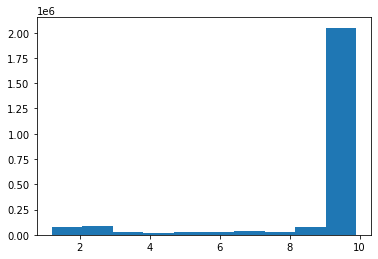

In [64]:
plt.hist(traffic_merged['visibility'].tolist())

(array([1178408.,  218446.,  235729.,   98064.,  126692.,  143965.,
          78056.,  114538.,  144173.,  112973.]),
 array([0.  , 0.34, 0.68, 1.02, 1.36, 1.7 , 2.04, 2.38, 2.72, 3.06, 3.4 ]),
 <BarContainer object of 10 artists>)

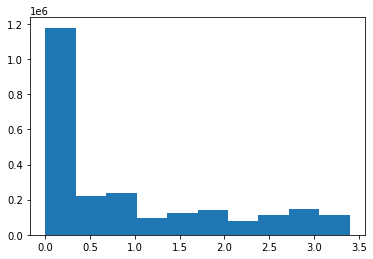

In [66]:
plt.hist(traffic_merged['solarenergy'].tolist())

(array([1178408.,  218446.,  235729.,   98064.,  126692.,  143965.,
          78056.,  114538.,  144173.,  112973.]),
 array([0.  , 0.34, 0.68, 1.02, 1.36, 1.7 , 2.04, 2.38, 2.72, 3.06, 3.4 ]),
 <BarContainer object of 10 artists>)

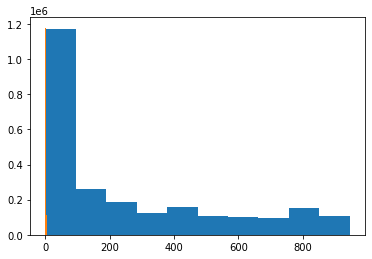

In [68]:
plt.hist(traffic_merged['solarradiation'].tolist())

(array([987057., 338545., 189843., 186458., 145498., 141785.,  85536.,
        114480., 148869., 112973.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

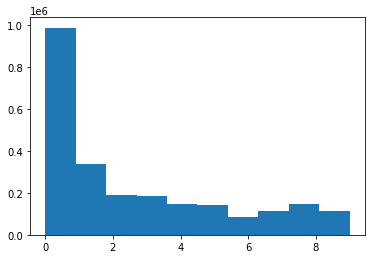

In [69]:
plt.hist(traffic_merged['uvindex'].tolist())

In [73]:
len(np.unique(traffic_merged['severerisk'].tolist()))
#drop this

1

(array([1323290.,  126557.,       0.,  300649.,       0.,  577813.,
         159128.,       0.,   88068.,    2096.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

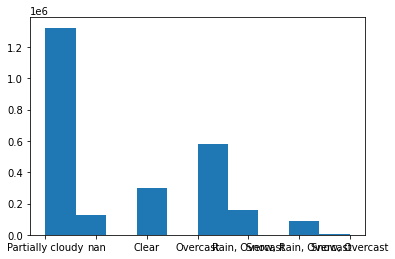

In [74]:
plt.hist(traffic_merged['conditions'].tolist())

(array([ 291417., 1031873.,  126557.,       0.,  141403.,  159246.,
              0.,  577813.,  200450.,   48842.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

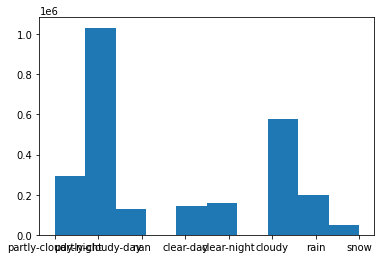

In [76]:
plt.hist(traffic_merged['icon'].tolist())
#drop this?

In [340]:
train_df = train_df.drop(['BUS COUNT                ', 'MESSAGE COUNT', 'datetime', 'name', 'precipprob', 
               'snow', 'windspeed', 'winddir', 'severerisk', 'icon', 'stations'], axis=1)

KeyError: "['BUS COUNT                ', 'MESSAGE COUNT', 'datetime', 'name', 'precipprob', 'snow', 'windspeed', 'winddir', 'severerisk', 'icon', 'stations'] not found in axis"

We need to sort by time in order to make the temperature more accirate

In [102]:
def make_std_time(row):
    return datetime.strptime(row["TIME"], '%m/%d/%Y %I:%M:%S %p')

In [103]:
train_df["std_datetime"] = traffic.apply(make_std_time, axis=1)
train_df

,TIME,SEGMENTID,SPEED,temp,feelslike,dew,humidity,precip,preciptype,snowdepth,windgust,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,std_datetime
2153800,04/05/2018 03:10:50 PM,969,23,41.2,34.7,20.8,43.74,0.000,NaN,0.00,19.3,1020.7,100.0,9.9,398.0,1.4,4.0,Overcast,2018-04-05 15:10:50
2039094,04/06/2018 07:10:21 PM,158,19,31.6,20.5,7.4,35.59,0.000,NaN,0.24,26.8,1018.4,84.4,9.9,51.0,0.2,1.0,Partially cloudy,2018-04-06 19:10:21
2027311,04/06/2018 09:50:30 PM,795,19,29.6,20.7,9.4,42.10,0.000,NaN,0.24,19.5,1019.7,24.2,9.9,0.0,0.0,0.0,Partially cloudy,2018-04-06 21:50:30
954031,04/20/2018 08:21:13 AM,1291,15,43.6,40.4,25.6,48.87,0.000,NaN,0.00,8.9,1033.3,24.2,9.9,243.0,0.9,2.0,Partially cloudy,2018-04-20 08:21:13
2311745,04/03/2018 10:40:10 PM,1281,18,35.6,27.1,34.5,95.58,0.000,NaN,0.12,20.6,1004.2,100.0,5.0,0.0,0.0,0.0,Overcast,2018-04-03 22:40:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340038,04/14/2018 02:30:55 PM,415,20,39.2,29.4,37.7,94.26,0.001,rain,0.00,31.8,1011.3,100.0,2.7,180.0,0.6,2.0,"Rain, Overcast",2018-04-14 14:30:55
2149515,04/05/2018 04:01:42 PM,1289,13,38.3,30.8,26.5,62.04,0.000,NaN,0.00,16.8,1020.1,100.0,9.1,298.0,1.1,3.0,Overcast,2018-04-05 16:01:42
1517271,04/12/2018 03:50:43 PM,480,20,71.9,71.9,43.5,36.02,0.000,NaN,0.00,17.2,1004.9,88.1,9.8,402.0,1.4,4.0,Partially cloudy,2018-04-12 15:50:43
2547999,04/01/2018 11:50:31 AM,864,14,30.3,24.1,12.5,47.06,0.000,NaN,0.00,13.4,1026.2,78.4,9.9,429.0,1.5,4.0,Partially cloudy,2018-04-01 11:50:31


In [109]:
train_df = train_df.sort_values(by=['std_datetime','SEGMENTID'])

In [148]:
train_df.head(2)

,TIME,SEGMENTID,SPEED,temp,feelslike,dew,humidity,precip,preciptype,snowdepth,windgust,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,std_datetime
2577550,04/01/2018 12:01:06 AM,1,25,32.9,27.8,14.3,45.72,0.0,NaN,0.0,13.2,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06
2577551,04/01/2018 12:01:06 AM,2,20,32.9,27.8,14.3,45.72,0.0,NaN,0.0,13.2,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06


In [153]:
for column in train_df.columns:
    print(column, np.sort(train_df[column].tolist()))

TIME ['04/01/2018 01:01:08 AM' '04/01/2018 01:01:08 AM'
 '04/01/2018 01:01:08 AM' ... '04/30/2018 12:50:41 PM'
 '04/30/2018 12:50:41 PM' '04/30/2018 12:50:41 PM']
SEGMENTID [   1    1    1 ... 1309 1309 1309]
SPEED [ 0  0  0 ... 60 60 60]
temp [20.8 20.8 20.8 ...  nan  nan  nan]
feelslike [10.6 10.6 10.6 ...  nan  nan  nan]
dew [ 4.  4.  4. ... nan nan nan]
humidity [13.62 13.62 13.62 ...   nan   nan   nan]
precip [ 0.  0.  0. ... nan nan nan]
preciptype ['nan' 'nan' 'nan' ... 'snow' 'snow' 'snow']
snowdepth [ 0.  0.  0. ... nan nan nan]
windgust [4.7 4.7 4.7 ... nan nan nan]
sealevelpressure [999.5 999.5 999.5 ...   nan   nan   nan]
cloudcover [ 0.  0.  0. ... nan nan nan]
visibility [1.2 1.2 1.2 ... nan nan nan]
solarradiation [ 0.  0.  0. ... nan nan nan]
solarenergy [ 0.  0.  0. ... nan nan nan]
uvindex [ 0.  0.  0. ... nan nan nan]
conditions ['Clear' 'Clear' 'Clear' ... 'nan' 'nan' 'nan']
std_datetime [Timestamp('2018-04-01 00:01:06') Timestamp('2018-04-01 00:01:06')
 Timestamp('

In [159]:
#train_df["temp"] = train_df["temp"].ffill()

In [160]:
train_df.ffill(axis='rows')
train_df["preciptype"] = train_df["preciptype"].bfill()
train_df.head(2)

,TIME,SEGMENTID,SPEED,temp,feelslike,dew,humidity,precip,preciptype,snowdepth,windgust,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,std_datetime
2577550,04/01/2018 12:01:06 AM,1,25,32.9,27.8,14.3,45.72,0.0,rain,0.0,13.2,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06
2577551,04/01/2018 12:01:06 AM,2,20,32.9,27.8,14.3,45.72,0.0,rain,0.0,13.2,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06


In [266]:
#TODO: 
#V Make time a numerical variable (maybe 2? 1 for time of day other for M-F day of week? 
    # (this works better than time of week bc otherwise u have no correlation of vars and less multimodality))
# V convert segmentid to lat/long combo (use the dictionary table, then apply function)
# convert categorical vars to numerical (dummy var for all 7 categories of weather type) 
# Standardize all numerical vars 
# perform stepwise mlr in both directions. I think 30 cols is too much for best subset selection

In [209]:
train_df["std_datetime"][1000001].weekday()

3

In [220]:
train_df["std_datetime"][1000023]

Timestamp('2018-04-19 18:20:59')

In [221]:
(train_df["std_datetime"][1000023].hour*3600)+(train_df["std_datetime"][1000023].minute*60)+train_df["std_datetime"][1000023].second

66059

In [226]:
# For a given row input, returns tuple (day of week as integer, seconds since midnight of that day) 
def add_weekday(row):
    cur_time = row["std_datetime"]
    return cur_time.weekday()
def add_time(row):
    cur_time = row["std_datetime"]
    return (cur_time.hour*3600)+(cur_time.minute*60)+(cur_time.second)

In [229]:
train_df["weekday"]=train_df.apply(add_weekday, axis=1)
train_df["time_of_day"]=train_df.apply(add_time, axis=1)

In [232]:
train_df.head()

,TIME,SEGMENTID,SPEED,temp,feelslike,dew,humidity,precip,preciptype,snowdepth,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,std_datetime,weekday,time_of_day
2577550,04/01/2018 12:01:06 AM,1,25,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66
2577551,04/01/2018 12:01:06 AM,2,20,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66
2577552,04/01/2018 12:01:06 AM,7,32,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66
2577553,04/01/2018 12:01:06 AM,8,27,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66
2577554,04/01/2018 12:01:06 AM,9,28,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,1026.0,78.4,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66


In [248]:
segments = pd.read_csv("segments_dict.csv")
segments

,SEGMENTID,STREET,DIRECTION,FROM_STREET,TO_STREET,LENGTH,STREET_HEADING,COMMENTS,START_LONGITUDE,START_LATITUDE,END_LONGITUDE,END_LATITUDE,CURRENT_SPEED,LAST_UPDATED
0,1284,Chicago,WB,Lake Shore Dr,Michigan,0.370000,E,NaN,-87.617048,41.896936,-87.624241,41.896835,-1,2011-08-10 00:00:00.0
1,951,Washington,WB,Kedzie,Schraeder,0.280000,W,NaN,-87.706169,41.882932,-87.711747,41.882818,-1,2010-07-21 14:51:00.0
2,750,Elston,SE,Milwaukee,Austin,0.330000,N,NaN,-87.783224,41.992665,-87.778073,41.989905,-1,2010-07-21 14:51:10.0
3,1164,Harlem,SB,Ogden,Pershing,0.173023,S,Outside City Limits,-87.802922,41.823751,-87.803025,41.821245,-1,2010-07-21 14:51:15.0
4,1122,127th,EB,Western,I-57 Expy,0.907892,W,Outside City Limits,-87.680077,41.662512,-87.662540,41.662850,-1,2010-07-21 14:51:06.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,179,Garfield,WB,Dan Ryan Expy,Halsted,0.720000,W,NaN,-87.631125,41.794672,-87.645159,41.794439,-1,2024-04-03 23:01:04.0
1253,882,LaSalle,SB,Clark,North Ave,0.120000,N,NaN,-87.632854,41.913172,-87.633328,41.911161,-1,2024-04-03 23:01:16.0
1254,219,Roosevelt,EB,Central Park,Kedzie,0.500000,W,NaN,-87.715422,41.866153,-87.705671,41.866268,22,2024-04-03 23:01:08.0
1255,1306,Clark,NB,Roosevelt,Harrison,0.500000,S,NaN,-87.630336,41.867374,-87.630574,41.874521,-1,2024-04-03 23:01:19.0


In [258]:
len(np.unique(segments["START_LONGITUDE"].tolist()))

1241

In [259]:
segments.columns

Index(['SEGMENTID', 'STREET', 'DIRECTION', 'FROM_STREET', 'TO_STREET',
       'LENGTH', ' STREET_HEADING', ' COMMENTS', 'START_LONGITUDE',
       ' START_LATITUDE', 'END_LONGITUDE', ' END_LATITUDE', ' CURRENT_SPEED',
       ' LAST_UPDATED'],
      dtype='object')

In [262]:
#dictionary to convert segment id into a lat/long combo. key is segment id, value is tuple (lat, long)
segments_dict = {}
for i in segments.iterrows():
    #print(i[1]["SEGMENTID"])
    long = (i[1]["START_LONGITUDE"] + i[1]["END_LONGITUDE"])/2
    lat = (i[1][" START_LATITUDE"] + i[1][" END_LATITUDE"])/2
    segments_dict[i[1]["SEGMENTID"]] = (lat, long)
segments_dict

{1284: (41.896885499999996, -87.6206445),
 951: (41.88287499985, -87.70895820555),
 750: (41.991284863450005, -87.7806487114),
 1164: (41.82249782195, -87.8029735547),
 1122: (41.662680692, -87.67130840375),
 682: (41.717648354800005, -87.6138716329),
 794: (41.9853570239, -87.6579604125),
 964: (41.892833766500004, -87.6426396998),
 701: (41.71765064735, -87.6142378877),
 432: (41.838144017, -87.62858103965),
 728: (41.96314129215, -87.73268368539999),
 748: (41.9819903236, -87.76326573535),
 989: (42.009125529200006, -87.89533914405),
 462: (41.72271175285, -87.54243363205),
 434: (41.8383362022, -87.61362918565),
 1143: (41.81198238075, -87.8020211779),
 991: (42.01015432125, -87.86196020265001),
 436: (41.83841842905, -87.62857804165),
 1139: (41.773967773449996, -87.802684564),
 1004: (42.01244803495, -87.67869653115),
 1065: (41.882108175, -87.740409035),
 1155: (41.74093328575, -87.79965274624999),
 982: (41.66268285155, -87.55924567880001),
 562: (41.74558995445, -87.7410459985

In [263]:
def add_lat(row):
    return segments_dict[row["SEGMENTID"]][0]
def add_long(row):
    return segments_dict[row["SEGMENTID"]][1]

In [264]:
train_df.apply(add_long, axis=1)

2577550   -87.718384
2577551   -87.708581
2577552   -87.659729
2577553   -87.650019
2577554   -87.638145
             ...    
76        -87.642077
78        -87.633549
79        -87.633549
81        -87.630655
82        -87.643306
Length: 2062081, dtype: float64

In [267]:
train_df["lat"] = train_df.apply(add_lat, axis=1)
train_df["long"] = train_df.apply(add_long, axis=1)
train_df

,TIME,SEGMENTID,SPEED,temp,feelslike,dew,humidity,precip,preciptype,snowdepth,...,visibility,solarradiation,solarenergy,uvindex,conditions,std_datetime,weekday,time_of_day,lat,long
2577550,04/01/2018 12:01:06 AM,1,25,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66,41.793104,-87.718384
2577551,04/01/2018 12:01:06 AM,2,20,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66,41.793259,-87.708581
2577552,04/01/2018 12:01:06 AM,7,32,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66,41.793961,-87.659729
2577553,04/01/2018 12:01:06 AM,8,27,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66,41.794100,-87.650019
2577554,04/01/2018 12:01:06 AM,9,28,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,9.9,496.0,1.8,5.0,Partially cloudy,2018-04-01 00:01:06,6,66,41.794281,-87.638145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,04/30/2018 11:50:28 PM,1300,12,67.2,67.2,29.4,24.24,0.0,NaN,0.0,...,9.9,0.0,0.0,0.0,Partially cloudy,2018-04-30 23:50:28,0,85828,41.878012,-87.642077
78,04/30/2018 11:50:28 PM,1305,20,67.2,67.2,29.4,24.24,0.0,NaN,0.0,...,9.9,0.0,0.0,0.0,Partially cloudy,2018-04-30 23:50:28,0,85828,41.874595,-87.633549
79,04/30/2018 11:50:28 PM,1305,20,67.2,67.2,29.4,24.24,0.0,NaN,0.0,...,9.9,0.0,0.0,0.0,Partially cloudy,2018-04-30 23:50:28,0,85828,41.874595,-87.633549
81,04/30/2018 11:50:28 PM,1307,25,67.2,67.2,29.4,24.24,0.0,NaN,0.0,...,9.9,0.0,0.0,0.0,Partially cloudy,2018-04-30 23:50:28,0,85828,41.870947,-87.630655


In [270]:
np.unique(train_df["conditions"].tolist())

array(['Clear', 'Overcast', 'Partially cloudy', 'Rain, Overcast',
       'Snow, Overcast', 'Snow, Rain, Overcast', 'nan'], dtype='<U32')

In [271]:
def is_clear(row):
    return 1 if row["conditions"]=="Clear" else 0
def is_overcast(row):
    return 1 if row["conditions"]=="Overcast" else 0
def is_partcloud(row):
    return 1 if row["conditions"]=="Partially cloudy" else 0
def is_rainovercase(row):
    return 1 if row["conditions"]=="Rain, Overcast" else 0
def is_snowovercast(row):
    return 1 if row["conditions"]=="Snow, Overcast" else 0
def is_snowrainovercase(row):
    return 1 if row["conditions"]=="Snow, Rain, Overcast" else 0

In [272]:
train_df["is_clear"] = train_df.apply(is_clear, axis=1)
train_df["is_overcast"] = train_df.apply(is_overcast, axis=1)
train_df["is_partcloud"] = train_df.apply(is_partcloud, axis=1)
train_df["is_rainovercase"] = train_df.apply(is_rainovercase, axis=1)
train_df["is_snowovercast"] = train_df.apply(is_snowovercast, axis=1)
train_df["is_snowrainovercase"] = train_df.apply(is_snowrainovercase, axis=1)
train_df

,TIME,SEGMENTID,SPEED,temp,feelslike,dew,humidity,precip,preciptype,snowdepth,...,weekday,time_of_day,lat,long,is_clear,is_overcast,is_partcloud,is_rainovercase,is_snowovercast,is_snowrainovercase
2577550,04/01/2018 12:01:06 AM,1,25,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,6,66,41.793104,-87.718384,0,0,1,0,0,0
2577551,04/01/2018 12:01:06 AM,2,20,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,6,66,41.793259,-87.708581,0,0,1,0,0,0
2577552,04/01/2018 12:01:06 AM,7,32,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,6,66,41.793961,-87.659729,0,0,1,0,0,0
2577553,04/01/2018 12:01:06 AM,8,27,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,6,66,41.794100,-87.650019,0,0,1,0,0,0
2577554,04/01/2018 12:01:06 AM,9,28,32.9,27.8,14.3,45.72,0.0,rain,0.0,...,6,66,41.794281,-87.638145,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,04/30/2018 11:50:28 PM,1300,12,67.2,67.2,29.4,24.24,0.0,NaN,0.0,...,0,85828,41.878012,-87.642077,0,0,1,0,0,0
78,04/30/2018 11:50:28 PM,1305,20,67.2,67.2,29.4,24.24,0.0,NaN,0.0,...,0,85828,41.874595,-87.633549,0,0,1,0,0,0
79,04/30/2018 11:50:28 PM,1305,20,67.2,67.2,29.4,24.24,0.0,NaN,0.0,...,0,85828,41.874595,-87.633549,0,0,1,0,0,0
81,04/30/2018 11:50:28 PM,1307,25,67.2,67.2,29.4,24.24,0.0,NaN,0.0,...,0,85828,41.870947,-87.630655,0,0,1,0,0,0


In [279]:
train_df[["conditions", "is_clear","is_overcast","is_partcloud", "is_rainovercase", "is_snowovercast", "is_snowrainovercase"]].sample(10)

,conditions,is_clear,is_overcast,is_partcloud,is_rainovercase,is_snowovercast,is_snowrainovercase
600885,Overcast,0,1,0,0,0,0
1018107,Partially cloudy,0,0,1,0,0,0
1515616,Partially cloudy,0,0,1,0,0,0
2236789,Partially cloudy,0,0,1,0,0,0
237555,Partially cloudy,0,0,1,0,0,0
93705,Clear,1,0,0,0,0,0
379450,Partially cloudy,0,0,1,0,0,0
233105,Partially cloudy,0,0,1,0,0,0
1495462,Overcast,0,1,0,0,0,0
2028714,Partially cloudy,0,0,1,0,0,0


In [329]:
np.unique(train_df["preciptype"].tolist())

array(['rain', 'rain,snow', 'snow'], dtype='<U9')

In [281]:
train_df.columns

Index(['TIME', 'SEGMENTID', 'SPEED', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'preciptype', 'snowdepth', 'windgust', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'std_datetime', 'weekday', 'time_of_day', 'lat', 'long',
       'is_clear', 'is_overcast', 'is_partcloud', 'is_rainovercase',
       'is_snowovercast', 'is_snowrainovercase'],
      dtype='object')

In [284]:
train_df = train_df.drop(['TIME', 'SEGMENTID', 'conditions', 'std_datetime'], axis=1)
train_df 

,SPEED,temp,feelslike,dew,humidity,precip,preciptype,snowdepth,windgust,sealevelpressure,...,weekday,time_of_day,lat,long,is_clear,is_overcast,is_partcloud,is_rainovercase,is_snowovercast,is_snowrainovercase
2577550,25,32.9,27.8,14.3,45.72,0.0,rain,0.0,13.2,1026.0,...,6,66,41.793104,-87.718384,0,0,1,0,0,0
2577551,20,32.9,27.8,14.3,45.72,0.0,rain,0.0,13.2,1026.0,...,6,66,41.793259,-87.708581,0,0,1,0,0,0
2577552,32,32.9,27.8,14.3,45.72,0.0,rain,0.0,13.2,1026.0,...,6,66,41.793961,-87.659729,0,0,1,0,0,0
2577553,27,32.9,27.8,14.3,45.72,0.0,rain,0.0,13.2,1026.0,...,6,66,41.794100,-87.650019,0,0,1,0,0,0
2577554,28,32.9,27.8,14.3,45.72,0.0,rain,0.0,13.2,1026.0,...,6,66,41.794281,-87.638145,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,12,67.2,67.2,29.4,24.24,0.0,NaN,0.0,27.7,1014.9,...,0,85828,41.878012,-87.642077,0,0,1,0,0,0
78,20,67.2,67.2,29.4,24.24,0.0,NaN,0.0,27.7,1014.9,...,0,85828,41.874595,-87.633549,0,0,1,0,0,0
79,20,67.2,67.2,29.4,24.24,0.0,NaN,0.0,27.7,1014.9,...,0,85828,41.874595,-87.633549,0,0,1,0,0,0
81,25,67.2,67.2,29.4,24.24,0.0,NaN,0.0,27.7,1014.9,...,0,85828,41.870947,-87.630655,0,0,1,0,0,0


In [296]:
for column in train_df.columns:
    if train_df[column].isnull().any():
        # If NaN values are found, raise an exception
        #print(column)
        raise Exception(f"NaN values found in column {column}")

In [295]:
train_df = train_df.ffill(axis='rows').bfill(axis='rows')

In [298]:
!pip install sklearn

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [306]:
from sklearn import linear_model
import pandas as pd
import statsmodels.api as sm

In [307]:
alpha_e = alpha_r = 0.1

In [321]:
train_df.columns.tolist()

['SPEED',
 'temp',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'preciptype',
 'snowdepth',
 'windgust',
 'sealevelpressure',
 'cloudcover',
 'visibility',
 'solarradiation',
 'solarenergy',
 'uvindex',
 'weekday',
 'time_of_day',
 'lat',
 'long',
 'is_clear',
 'is_overcast',
 'is_partcloud',
 'is_rainovercase',
 'is_snowovercast',
 'is_snowrainovercase']

In [332]:
df_allparams = train_df.drop(["SPEED"], axis=1)
df_allparams

,temp,feelslike,dew,humidity,precip,snowdepth,windgust,sealevelpressure,cloudcover,visibility,...,weekday,time_of_day,lat,long,is_clear,is_overcast,is_partcloud,is_rainovercase,is_snowovercast,is_snowrainovercase
2577550,32.9,27.8,14.3,45.72,0.0,0.0,13.2,1026.0,78.4,9.9,...,6,66,41.793104,-87.718384,0,0,1,0,0,0
2577551,32.9,27.8,14.3,45.72,0.0,0.0,13.2,1026.0,78.4,9.9,...,6,66,41.793259,-87.708581,0,0,1,0,0,0
2577552,32.9,27.8,14.3,45.72,0.0,0.0,13.2,1026.0,78.4,9.9,...,6,66,41.793961,-87.659729,0,0,1,0,0,0
2577553,32.9,27.8,14.3,45.72,0.0,0.0,13.2,1026.0,78.4,9.9,...,6,66,41.794100,-87.650019,0,0,1,0,0,0
2577554,32.9,27.8,14.3,45.72,0.0,0.0,13.2,1026.0,78.4,9.9,...,6,66,41.794281,-87.638145,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,67.2,67.2,29.4,24.24,0.0,0.0,27.7,1014.9,24.2,9.9,...,0,85828,41.878012,-87.642077,0,0,1,0,0,0
78,67.2,67.2,29.4,24.24,0.0,0.0,27.7,1014.9,24.2,9.9,...,0,85828,41.874595,-87.633549,0,0,1,0,0,0
79,67.2,67.2,29.4,24.24,0.0,0.0,27.7,1014.9,24.2,9.9,...,0,85828,41.874595,-87.633549,0,0,1,0,0,0
81,67.2,67.2,29.4,24.24,0.0,0.0,27.7,1014.9,24.2,9.9,...,0,85828,41.870947,-87.630655,0,0,1,0,0,0


In [319]:
train_df["SPEED"].tolist()[:5]

[25, 20, 32, 27, 28]

In [326]:
X

,const,preciptype
2577550,1.0,rain
2577551,1.0,rain
2577552,1.0,rain
2577553,1.0,rain
2577554,1.0,rain
...,...,...
76,1.0,rain
78,1.0,rain
79,1.0,rain
81,1.0,rain


In [331]:
train_df = train_df.drop(['preciptype'], axis=1)

In [324]:
X = df_allparams[[i]]
X = sm.add_constant(X)
Y = train_df["SPEED"].tolist()
model = sm.OLS(Y, X).fit()

         const preciptype
2577550    1.0       rain
2577551    1.0       rain
2577552    1.0       rain
2577553    1.0       rain
2577554    1.0       rain
...        ...        ...
76         1.0       rain
78         1.0       rain
79         1.0       rain
81         1.0       rain
82         1.0       rain

[2062081 rows x 2 columns]


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [333]:
#This cell is where we do stepwise regression
in_model = [] #variables in our model
out_model = df_allparams.columns.tolist() #variables not in (outside) our model

#Initialization: find which value to begin with
print("Initialization phase: we first find the predictor with lowest p-value and insert into our model")
lowest_p = 1
new_param = ''
for i in out_model:
    X = df_allparams[[i]]
    X = sm.add_constant(X)
    Y = train_df["SPEED"].tolist()
    model = sm.OLS(Y, X).fit()
    if(model.pvalues[i] < lowest_p):
        lowest_p = model.pvalues[i]
        new_param = i
    #print(model.pvalues[i])
  #print(new_param, lowest_p)

in_model = [new_param]
out_model.remove(new_param)

print("We now begin stepwise regression")
while(True):
    print("current predictors being used:", in_model)
    #print(in_model)
    #print(out_model)

    print("Forward step")
    #Forward step
    lowest_p = 1
    new_param = ''
    for i in out_model:
        print("Considering entering variable ", i)
        X = df_allparams[in_model + [i]]
        X = sm.add_constant(X)
        Y = train_df["SPEED"].tolist()
        model = sm.OLS(Y, X).fit()
        #print(model.summary())
        print("p-value of variable", i, "is", model.pvalues[i])
        if(model.pvalues[i] < lowest_p):
            lowest_p = model.pvalues[i]
            new_param = i
    print("Lowest p value found is from variable", new_param, "with value", lowest_p)
    if(lowest_p < alpha_e):
        print("this is lower than alpha_e=", alpha_e, "so we add it to our model")
        in_model.append(new_param)
        out_model.remove(new_param)
    else:
        print("This is higher than alpha_e=", alpha_e, "so we terminate procedure here")
        break


    print("Backward step")
    #Backward step
    remove_these = []
    X = df_allparams[in_model]
    X = sm.add_constant(X)
    Y = train_df["SPEED"].tolist()
    model = sm.OLS(Y, X).fit()
    for i in in_model:
        print("Considering removing variable", i)
        print("p-value of variable", i, "is", model.pvalues[i])
        if(model.pvalues[i] > alpha_r):
            print("With the new model, p-value found greater than alpha_r=", alpha_r)
            print("Remove variable", i, "with p-value", model.pvalues[i])
            remove_these.append(i)
    if(remove_these == []):
        print("No variables removed. All p-values remain statistically significant at value above alpha_r=", alpha_r)
    for i in remove_these:
        in_model.append(new_param)
        out_model.remove(new_param)

print("Final set of predictors being used:", in_model)

Initialization phase: we first find the predictor with lowest p-value and insert into our model
We now begin stepwise regression
current predictors being used: ['temp']
Forward step
Considering entering variable  feelslike
p-value of variable feelslike is 0.0
Considering entering variable  dew
p-value of variable dew is 5.640862198951867e-49
Considering entering variable  humidity
p-value of variable humidity is 4.226143356230973e-83
Considering entering variable  precip
p-value of variable precip is 1.653255910782205e-49
Considering entering variable  snowdepth
p-value of variable snowdepth is 0.0
Considering entering variable  windgust
p-value of variable windgust is 0.0
Considering entering variable  sealevelpressure
p-value of variable sealevelpressure is 0.0
Considering entering variable  cloudcover
p-value of variable cloudcover is 0.0
Considering entering variable  visibility
p-value of variable visibility is 0.0
Considering entering variable  solarradiation
p-value of variable 

p-value of variable solarenergy is 0.20648637230712702
Considering entering variable  uvindex
p-value of variable uvindex is 8.110834251064447e-09
Considering entering variable  weekday
p-value of variable weekday is 0.0
Considering entering variable  time_of_day
p-value of variable time_of_day is 0.0
Considering entering variable  lat
p-value of variable lat is 0.0
Considering entering variable  long
p-value of variable long is 0.0
Considering entering variable  is_clear
p-value of variable is_clear is 1.1114328874237152e-18
Considering entering variable  is_overcast
p-value of variable is_overcast is 6.313867195776949e-05
Considering entering variable  is_partcloud
p-value of variable is_partcloud is 1.3740057493164314e-59
Considering entering variable  is_rainovercase
p-value of variable is_rainovercase is 8.501081600888324e-138
Considering entering variable  is_snowovercast
p-value of variable is_snowovercast is 4.1891613791785974e-21
Considering entering variable  is_snowrainoverc

p-value of variable is_rainovercase is 1.638380486229919e-194
Considering entering variable  is_snowovercast
p-value of variable is_snowovercast is 9.592975936260183e-12
Considering entering variable  is_snowrainovercase
p-value of variable is_snowrainovercase is 3.35947629363797e-11
Lowest p value found is from variable visibility with value 1.7881704591773452e-222
this is lower than alpha_e= 0.1 so we add it to our model
Backward step
Considering removing variable temp
p-value of variable temp is 2.796070617794007e-148
Considering removing variable feelslike
p-value of variable feelslike is 2.894111941767143e-142
Considering removing variable cloudcover
p-value of variable cloudcover is 6.843776670326197e-181
Considering removing variable solarradiation
p-value of variable solarradiation is 0.0
Considering removing variable weekday
p-value of variable weekday is 0.0
Considering removing variable time_of_day
p-value of variable time_of_day is 0.0
Considering removing variable lat
p-va

p-value of variable dew is 0.07284383932964437
Considering entering variable  humidity
p-value of variable humidity is 0.020161200191358628
Considering entering variable  precip
p-value of variable precip is 8.994513920089907e-09
Considering entering variable  snowdepth
p-value of variable snowdepth is 6.601173289756822e-13
Considering entering variable  sealevelpressure
p-value of variable sealevelpressure is 1.6043052808980007e-17
Considering entering variable  solarenergy
p-value of variable solarenergy is 0.13737012897782983
Considering entering variable  uvindex
p-value of variable uvindex is 1.9872413657734973e-05
Considering entering variable  is_clear
p-value of variable is_clear is 3.79910602861107e-20
Considering entering variable  is_overcast
p-value of variable is_overcast is 4.015136845710109e-23
Considering entering variable  is_partcloud
p-value of variable is_partcloud is 0.044825432096469636
Considering entering variable  is_snowovercast
p-value of variable is_snowover

p-value of variable humidity is 0.27148163182816076
Considering entering variable  precip
p-value of variable precip is 3.697956178213706e-07
Considering entering variable  sealevelpressure
p-value of variable sealevelpressure is 5.613933833109672e-17
Considering entering variable  solarenergy
p-value of variable solarenergy is 0.8670866818953005
Considering entering variable  uvindex
p-value of variable uvindex is 0.012892883263965937
Considering entering variable  is_partcloud
p-value of variable is_partcloud is 0.4217208413451442
Considering entering variable  is_snowovercast
p-value of variable is_snowovercast is 8.540354956001237e-13
Considering entering variable  is_snowrainovercase
p-value of variable is_snowrainovercase is 0.06282375541265948
Lowest p value found is from variable sealevelpressure with value 5.613933833109672e-17
this is lower than alpha_e= 0.1 so we add it to our model
Backward step
Considering removing variable temp
p-value of variable temp is 3.03281097265376

p-value of variable precip is 2.3152188227680695e-07
Considering entering variable  solarenergy
p-value of variable solarenergy is 0.45521102861419505
Considering entering variable  uvindex
p-value of variable uvindex is 0.009268075555459897
Considering entering variable  is_partcloud
p-value of variable is_partcloud is 0.03529104841817325
Considering entering variable  is_snowrainovercase
p-value of variable is_snowrainovercase is 0.27686534494394766
Lowest p value found is from variable precip with value 2.3152188227680695e-07
this is lower than alpha_e= 0.1 so we add it to our model
Backward step
Considering removing variable temp
p-value of variable temp is 6.111430425124597e-09
Considering removing variable feelslike
p-value of variable feelslike is 3.404026656602777e-07
Considering removing variable cloudcover
p-value of variable cloudcover is 4.352124170114277e-10
Considering removing variable solarradiation
p-value of variable solarradiation is 0.0
Considering removing variable

p-value of variable dew is 0.5944291085661685
Considering entering variable  solarenergy
p-value of variable solarenergy is 0.4975626461109329
Considering entering variable  is_snowrainovercase
p-value of variable is_snowrainovercase is 0.1703800751419745
Lowest p value found is from variable is_snowrainovercase with value 0.1703800751419745
This is higher than alpha_e= 0.1 so we terminate procedure here
Final set of predictors being used: ['temp', 'feelslike', 'cloudcover', 'solarradiation', 'weekday', 'time_of_day', 'lat', 'visibility', 'long', 'is_rainovercase', 'windgust', 'is_overcast', 'is_clear', 'snowdepth', 'sealevelpressure', 'is_snowovercast', 'humidity', 'precip', 'is_partcloud', 'uvindex']


In [335]:
out_model

['dew', 'solarenergy', 'is_snowrainovercase']